In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # Silence some warnings

c:\Users\Airly\anaconda3\envs\geospatial\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Airly\AppData\Local\Temp\ipykernel_13288\3475797434.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. H

Resources:

- source for colors https://twitter.com/gontsa/status/1722018514129600739/photo/1

- source for World borders https://www.geoboundaries.org/

- ESPG website: https://epsg.io/


In [4]:
import os
os.chdir(r'd:\git20\GeoPython_Ukraine2024')

In [ ]:
# todo download and unzip
https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip

In [3]:
gdf_countries = gpd.read_file(r'd:\GIS\2024_workshops\geoBoundariesCGAZ_ADM0.shp')
# d:\GIS\2024_workshops\geoBoundariesCGAZ_ADM0.shp
gdf_countries.head(3)

,shapeGroup,shapeType,shapeName,geometry
0,AFG,ADM0,Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314..."
1,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34..."
2,ALB,ADM0,Albania,"POLYGON ((20.07889 42.55580, 20.07928 42.55546..."


In [12]:
gdf_countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shapeGroup  218 non-null    object  
 1   shapeType   218 non-null    object  
 2   shapeName   218 non-null    object  
 3   geometry    218 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 6.9+ KB


<Axes: >

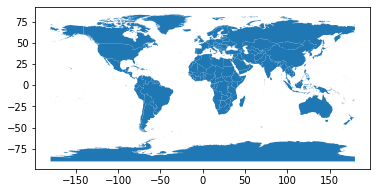

In [13]:
gdf_countries.crs
gdf_countries.plot()

<Axes: >

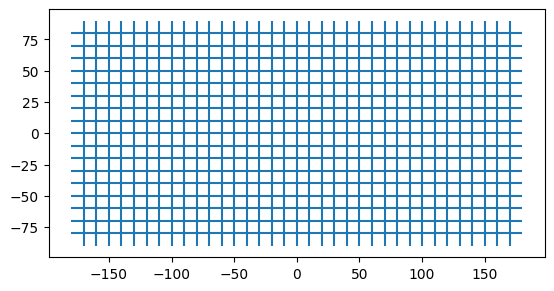

In [5]:
graticules = gpd.read_file(r'.\data\graticules_10.shp')
# graticules.plot()
graticules = graticules[graticules.degrees <180]
graticules.plot()

(-22041259.17706817,
 22041259.17706818,
 -11020629.588534083,
 11020629.588534083)

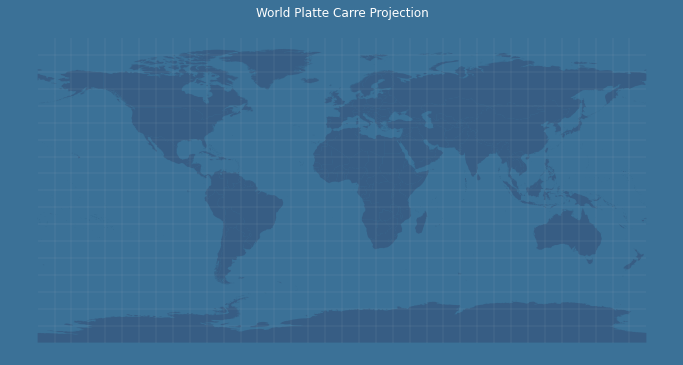

In [15]:
# Platte Carre projection
#  diffrences to just plot

gdf_world_plate_care = gdf_countries.to_crs('ESRI:54001')
graticules_plate_care = graticules.to_crs('ESRI:54001')

plt.rcParams['figure.facecolor'] = '#3b7197'
fig, ax = plt.subplots(figsize=(12,10))
gdf_world_plate_care.plot(ax=ax, color='#375d84')
graticules_plate_care.plot(ax=ax, color='lightgray', linewidth=0.1)
plt.title('World Platte Carre Projection', color='white')
ax.axis('off')

<Axes: >

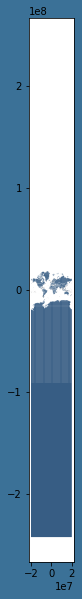

In [16]:
# Mercator projection
# clip to 85 N and 65 S - way around
# more about the concept of CRS, epsg.io

gdf_world_mercator = gdf_countries.to_crs('EPSG:3857')
graticules_mercator = graticules.to_crs('EPSG:3857')
# gdf_world_mercator.plot(figsize=(12,30))

fig, ax = plt.subplots(figsize=(12,10))
gdf_world_mercator.plot(ax=ax, color='#375d84')
graticules_mercator.plot(ax=ax, color='white', linewidth=0.1)
# ax.axis('off')

Text(0.5, 1.0, 'World Mercator Projection')

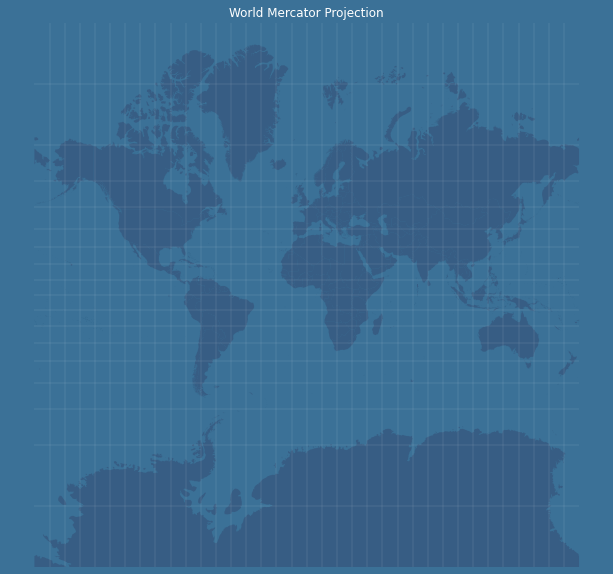

In [17]:
# Mercator projection
# clip to 85 N and 65 S - way around
# more about the concept of CRS, epsg.io

gdf_world_mercator = gdf_countries.to_crs('EPSG:3857')
graticules_mercator = graticules.to_crs('EPSG:3857')
# gdf_world_mercator.plot(figsize=(12,30))

fig, ax = plt.subplots(figsize=(12,10))
gdf_world_mercator.plot(ax=ax, color='#375d84')
graticules_mercator.plot(ax=ax, color='white', linewidth=0.1)
ax.set_facecolor("#3b7197")
ax.axis('off')
ax.set_ylim(-20_000_000, 20_000_000)
plt.title('World Mercator Projection', color='white')

Text(0.5, 1.0, 'World Mollweide Projection')

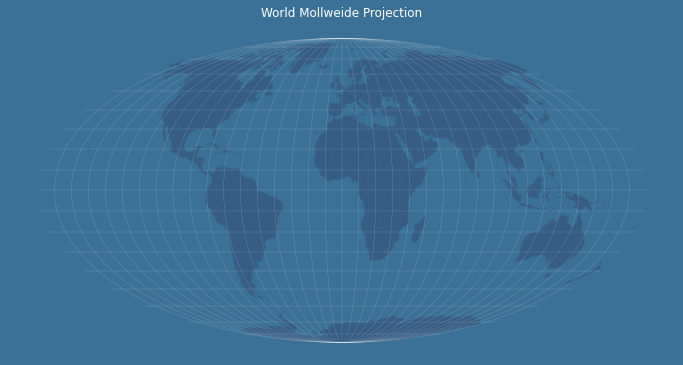

In [18]:
# Mollweide - equal area

plt.rcParams['figure.facecolor'] = '#3b7197'
gdf_world_mollweide = gdf_countries.to_crs('ESRI:54009')
graticules_mollweide = graticules.to_crs('ESRI:54009')
fig, ax = plt.subplots(figsize=(12,10))

gdf_world_mollweide.plot(ax=ax, color='#375d84')
graticules_mollweide.plot(ax=ax, color='white', linewidth=0.1)
ax.axis('off')
plt.title('World Mollweide Projection', color='white')

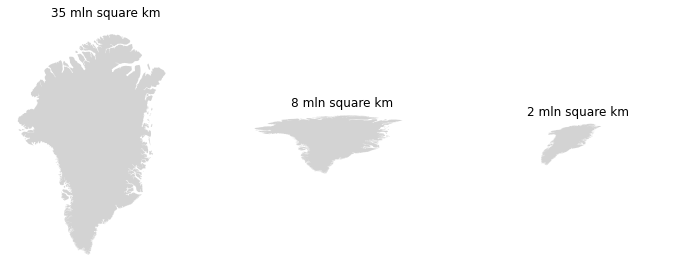

In [19]:
# Displaying Greenland in different projections, in the same scale

import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
fig, axs = plt.subplots(1, 3, figsize=(12,8))
# TODO plot names of projs

for ax, gdf in zip(axs, [gdf_world_mercator, gdf_world_plate_care, gdf_world_mollweide]):
    gdf_cntr = gdf[gdf.shapeName=='Greenland']
    gdf_cntr.plot(ax=ax, color='lightgray', linewidth=0)
    ax.axis('off')
    ax.set_title(f'{int(gdf_cntr.geometry.area.values[0]/1_000_000_000_000)} mln square km')
    ax.set_xlim(int(gdf_cntr.centroid.x) - 4_000_000, int(gdf_cntr.centroid.x) + 5_000_000)


In [20]:
# distance - more complicated matter

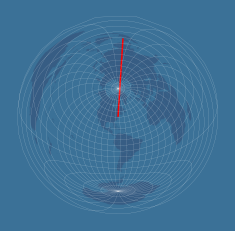

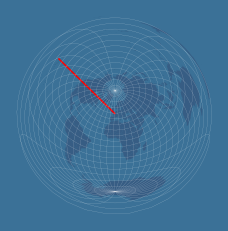

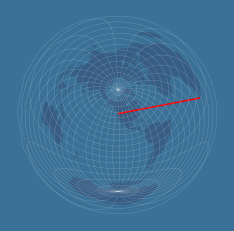

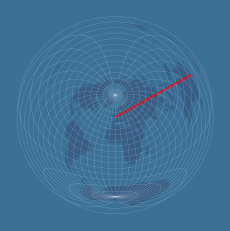

In [21]:
import shapely
from shapely.geometry import Point, LineString
import pandas as pd

points_org = [Point(103.793, 1.297), Point(-149.567, -17.547), Point(18.598, -33.976), Point(151.186, -33.940)]
points_dst = [Point(-73.780, 40.645), Point(2.332, 48.854), Point(-122.311, 47.541), Point(0.058, 51.508)]

# Plot line from central points,
list_gdf = []


for point_dest, point_org in zip(points_org, points_dst):
    plt.rcParams['figure.facecolor'] = '#3b7197'
    crs_orig_point = (f'+proj=aeqd +datum=WGS84 +units=m +lat_0={point_org.y} +lon_0={point_org.x}')
    # Tworzenie linii między punktami
    linia = LineString([point_org, point_dest])

    # Tworzenie GeoDataFrame z linią
    gdf_linia = gpd.GeoDataFrame(geometry=[linia], crs='epsg:4326')

    gdf_linia = gdf_linia.to_crs(crs_orig_point)
    new_line = shapely.segmentize(gdf_linia, 1000)
    new_line = new_line.set_crs(crs_orig_point)
    
    ig, ax = plt.subplots()
    gdf_countries_azimut = gdf_countries.to_crs(crs_orig_point)
    gdf_countries_azimut.plot(color='#375d84',ax=ax)
    new_line.plot(ax=ax, color='red')
    
    graticules_crs = graticules.to_crs(crs_orig_point)
    graticules_crs.plot(ax=ax, color='white', linewidth=0.1)
    ax.axis('off')
    
    list_gdf.append(new_line.to_crs('ESRI:54009'))
    # TODO make sense in loop - plot ind path
    

gdf_linie = pd.concat(list_gdf)
gdf_linie = gdf_linie.to_crs(crs_orig_point)


### how the great circles look in popular map projections?

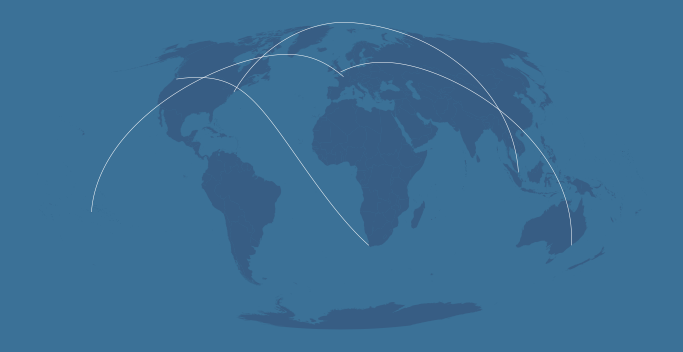

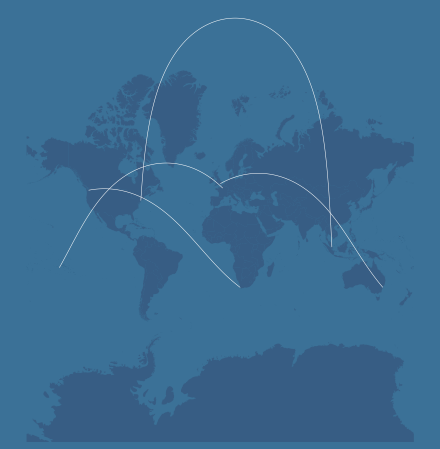

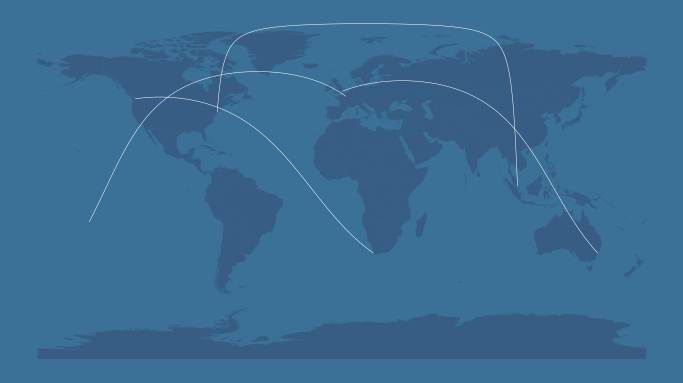

In [22]:
crss =['ESRI:54009', 'EPSG:3857', 'EPSG:4326']
plt.rcParams['figure.facecolor'] = '#3b7197'
for crs in crss:
    fig, ax = plt.subplots(figsize=(12,8))
    gdf_countries_moll = gdf_countries.to_crs(crs)
    gdf_countries_moll.plot(ax=ax, color='#375d84')
    gdf_linie.to_crs(crs).plot(ax=ax, linewidth=0.5, color='white')
    ax.axis('off')
    if crs == 'EPSG:3857':
        ax.set_ylim(-20_000_000, 25_000_000)